In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Deeplearning/Datasets/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
X=df.iloc[:,3:13]
Y=df.iloc[:,-1]

In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [9]:
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
X_train.shape

(8000, 8)

In [14]:
X_test.shape

(2000, 8)

In [15]:
# feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [16]:
#create ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [17]:
# initilize ANN
classfier=Sequential()

In [18]:
# Adding input layer
classfier.add(Dense(units=11,activation='relu'))

In [20]:
# Adding first hidden layer
classfier.add(Dense(units=10,activation='relu'))
classfier.add(Dropout(0.2))

In [21]:
# Adding second hidden layer
classfier.add(Dense(units=7,activation='relu'))
classfier.add(Dropout(0.3))

In [22]:
# adding output layer
classfier.add(Dense(1,activation='sigmoid'))


In [23]:
classfier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
#Early stopping 
import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.02,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [26]:
model_history=classfier.fit(X_train,Y_train,validation_split=0.33,batch_size=15,epochs=500,callbacks=early_stopping)

Epoch 1/500
358/358 [==============================] - 6s 4ms/step - loss: 0.5361 - accuracy: 0.7848 - val_loss: 0.4695 - val_accuracy: 0.7955
Epoch 2/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4877 - accuracy: 0.7964 - val_loss: 0.4519 - val_accuracy: 0.7959
Epoch 3/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4724 - accuracy: 0.7987 - val_loss: 0.4455 - val_accuracy: 0.8008
Epoch 4/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4578 - accuracy: 0.8046 - val_loss: 0.4389 - val_accuracy: 0.8111
Epoch 5/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.8072 - val_loss: 0.4337 - val_accuracy: 0.8201
Epoch 6/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.8089 - val_loss: 0.4256 - val_accuracy: 0.8213
Epoch 7/500
358/358 [==============================] - 1s 4ms/step - loss: 0.4351 - accuracy: 0.8091 - val_loss: 0.4182 - val_accuracy: 0.8247

In [228]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

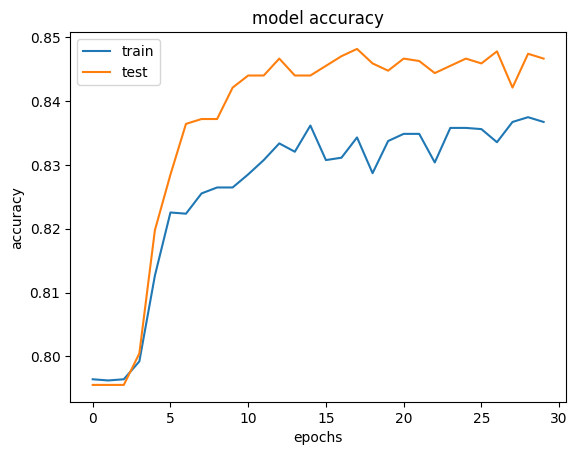

In [229]:
# summary history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

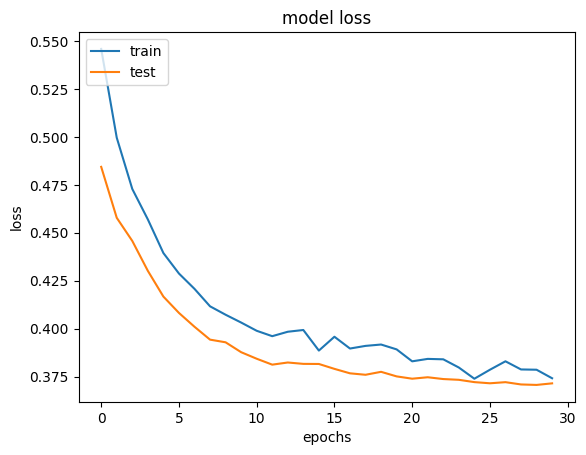

In [230]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [231]:
y_pred=classfier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [232]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,y_pred)

In [233]:
cf

array([[1548,   47],
       [ 233,  172]], dtype=int64)

In [234]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(Y_test,y_pred)

In [235]:
ac

0.86

In [236]:
# get the weights 
classfier.get_weights()

[array([[-1.21191777e-01,  8.71197414e-03, -3.07882410e-02,
         -2.50359960e-02,  3.52733910e-01,  3.16011876e-01,
          1.32546835e-02, -8.97448137e-02,  4.44330946e-02,
         -1.74010307e-01, -1.57999367e-01],
        [ 2.27851659e-01,  1.22952819e-01,  2.42673725e-01,
         -6.55363262e-01, -9.03240889e-02, -2.33843848e-01,
         -5.60489833e-01,  1.40489964e-02,  4.62141275e-01,
         -6.85717404e-01,  4.40627933e-01],
        [ 1.44563824e-01, -3.01012583e-02, -5.94705790e-02,
          2.89603025e-01, -2.11757906e-02, -2.69525319e-01,
         -1.65014658e-02, -1.80172265e-01,  1.44677132e-01,
          7.26574510e-02, -7.88655952e-02],
        [-3.88390929e-01,  1.94052741e-01, -1.13507934e-01,
         -4.32370961e-01,  6.68677911e-02, -4.58962440e-01,
          2.14451551e-02, -1.59186006e-01,  2.86888123e-01,
          4.65301126e-01, -2.41867036e-01],
        [ 6.20684206e-01,  9.89549518e-01, -7.71840096e-01,
          6.62865102e-01,  6.36013299e-02,  